In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
DATA_IN_PATH='/content/gdrive/MyDrive/Project/tf_m_04/'
print("파일 크기:")
for file in os.listdir(DATA_IN_PATH):
    if 'txt' in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) +'MB')

파일 크기:
ratings_train.txt             14.78MB
ratings_test.txt              4.94MB
ratings.txt                   19.72MB


총 20만개의 데이터
train = 15만
test = 5만으로 구성

In [4]:
train_data=pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header =0,  delimiter= '\t',quoting= 3)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [6]:
train_data.shape

(150000, 3)

In [7]:
train_length=train_data['document'].astype(str).apply(len)
train_length

0         19
1         33
2         17
3         29
4         61
          ..
149995    19
149996    13
149997    31
149998    27
149999    24
Name: document, Length: 150000, dtype: int64

Text(0, 0.5, 'Number of review')

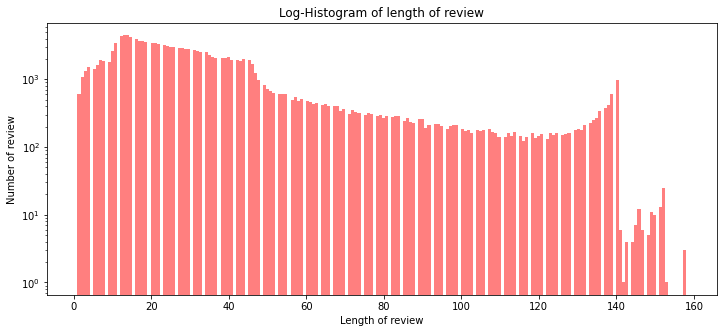

In [8]:
plt.figure(figsize=(12,5))
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')

In [9]:
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최댓값: 158
리뷰 길이 최솟값: 1
리뷰 길이 평균값: 35.24
리뷰 길이 표준편차: 29.58
리뷰 길이 중간값: 27.0
리뷰 길이 제1사분위: 16.0
리뷰 길이 제3사분위: 42.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5d94a33850>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5d94a38310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5d94a332d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5d94a38dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5d94a3e890>],
 'means': [<matplotlib.lines.Line2D at 0x7f5d94a3e350>]}

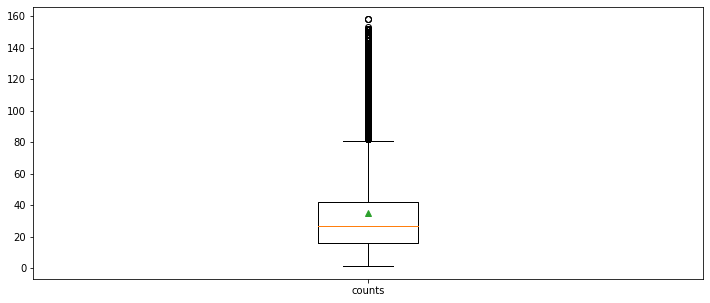

In [10]:
plt.figure(figsize=(12,5))
plt.boxplot(train_length,
            labels=['counts'],
            showmeans=True)

In [11]:
train_review=[review for review in train_data['document'] if type(review) == str]

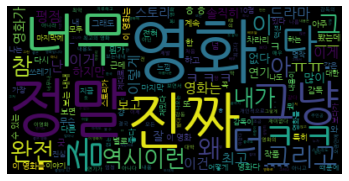

In [12]:
wordcloud=WordCloud(font_path= DATA_IN_PATH + 'NanumGothic.ttf').generate(' '.join(train_review))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


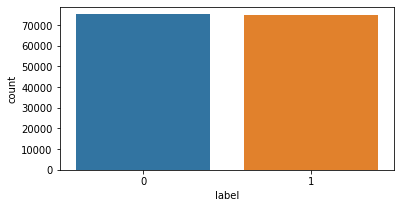

In [13]:
fig, axe=plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_data['label'])

In [14]:
print('긍정 리뷰 개수: {}'.format(train_data['label'].value_counts()[1]))
print('부정 리뷰 개수: {}'.format(train_data['label'].value_counts()[0]))

긍정 리뷰 개수: 74827
부정 리뷰 개수: 75173


Text(0, 0.5, 'Number of reviews')

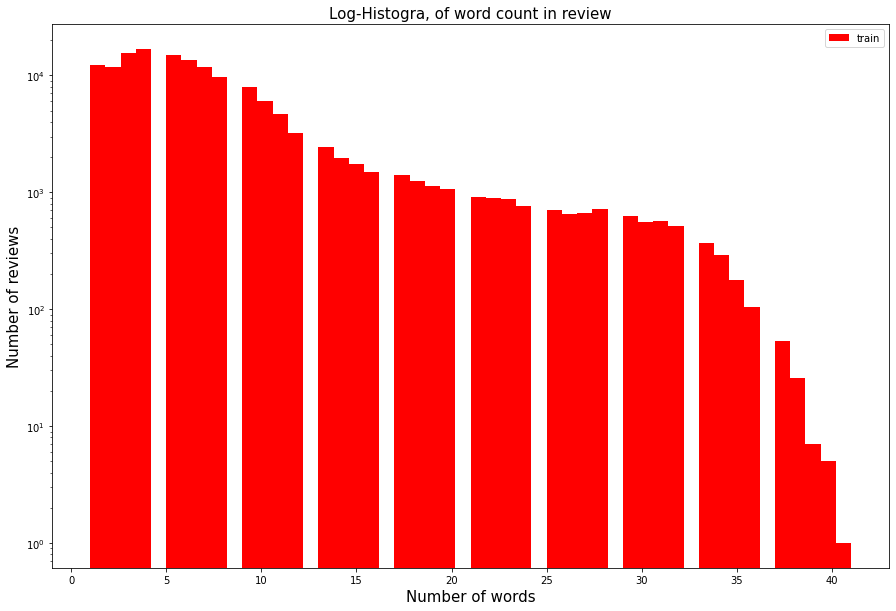

In [15]:
train_word_counts= train_data['document'].astype(str).apply(lambda x: len(x.split(' ')))
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.title('Log-Histogra, of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [16]:
print('리뷰 단어 개수 최댓값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최솟값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간값: {}'.format(np.median(train_word_counts)))
print('리뷰 단어 개수 제1사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제3사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최댓값: 41
리뷰 단어 개수 최솟값: 1
리뷰 단어 개수 평균값: 7.58
리뷰 단어 개수 표준편차: 6.51
리뷰 단어 개수 중간값: 6.0
리뷰 단어 개수 제1사분위: 3.0
리뷰 단어 개수 제3사분위: 9.0


In [18]:
qmarks=np.mean(train_data['document'].astype(str).apply(lambda x: '?' in x))
fullstop=np.mean(train_data['document'].astype(str).apply(lambda x: '.' in x))

print('물음표가 있는 질문 {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문 {:.2f}%'.format(fullstop * 100))

물음표가 있는 질문 8.25%
마침표가 있는 질문 51.76%
